In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import pandas as pd
import numpy as np

from myhelpers.equations import mhalo2mhi

# Load data

In [4]:
lightcone = np.loadtxt('../data/external/lightcone/BolshoiP_Bethermin_Mstar_z_0_1.dat')

In [5]:
lightcone = pd.DataFrame(data=lightcone, columns=['ra', 'dec', 'z', 'mhalo', 'mstar'])

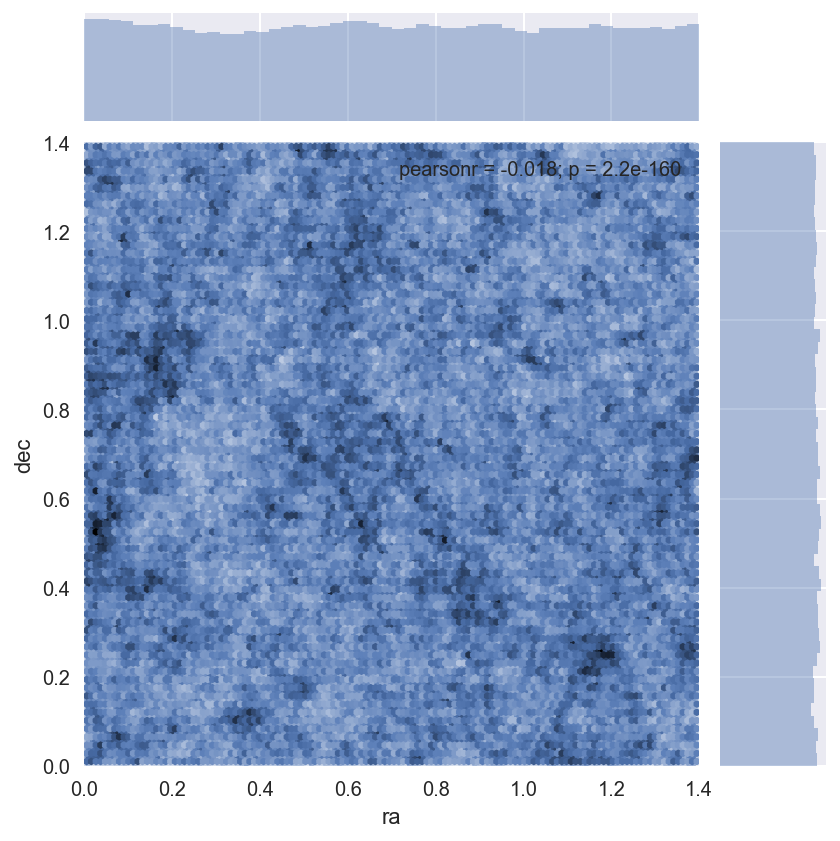

In [6]:
sns.jointplot(lightcone['ra'], lightcone['dec'], kind='hex')

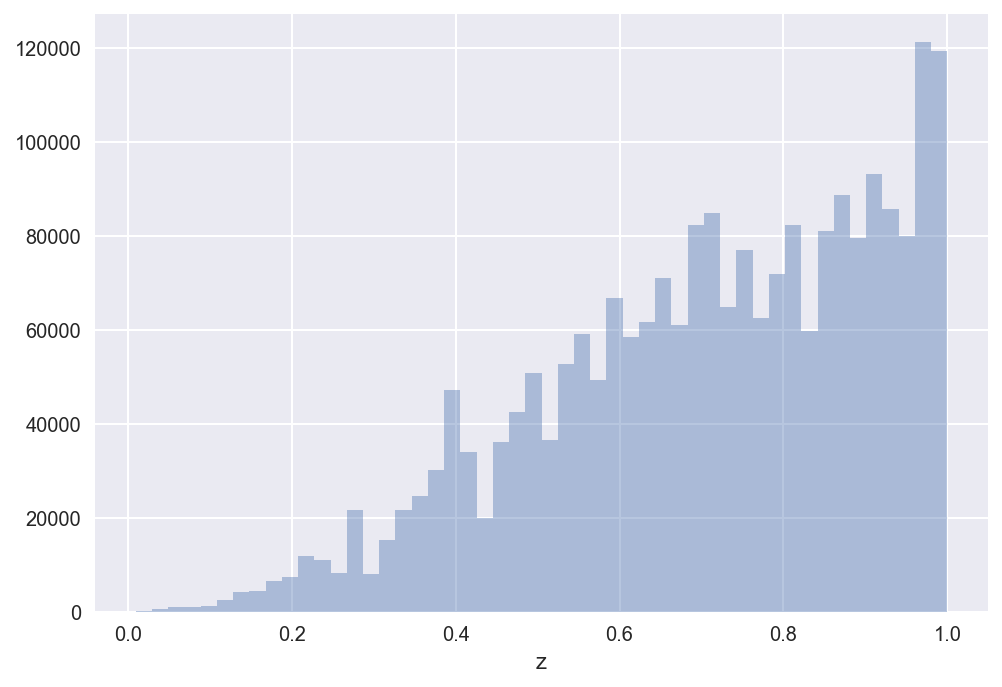

In [7]:
sns.distplot(lightcone['z'], kde=False)

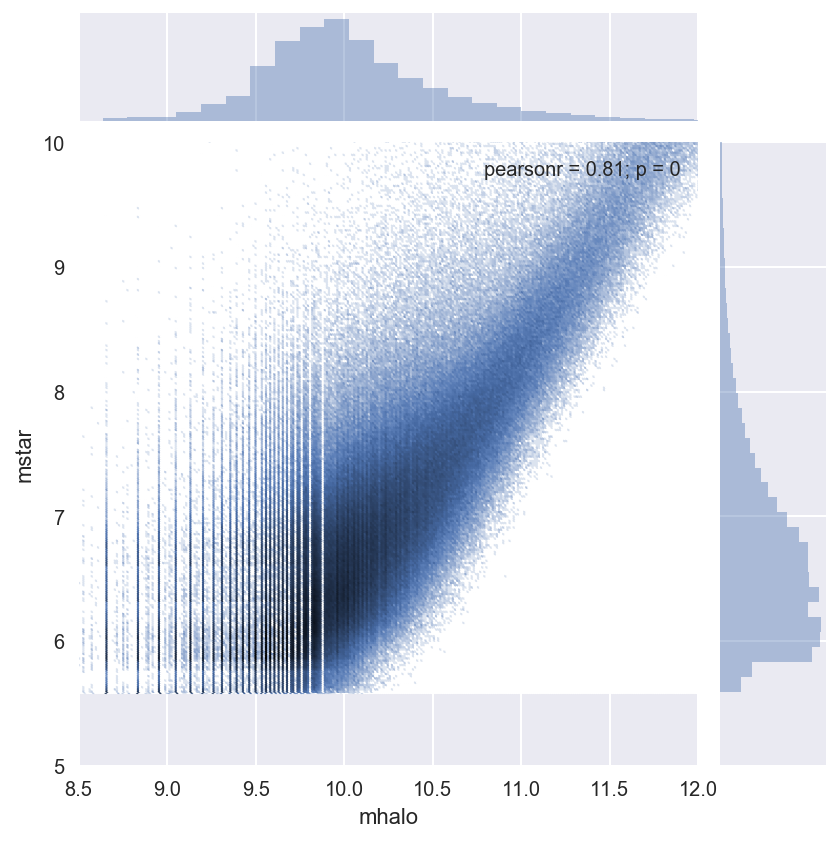

In [8]:
sns.jointplot(
    np.log10(lightcone['mhalo']),
    np.log10(lightcone['mstar']),
    kind='hex',
    xlim=[8.5, 12.],
    ylim=[5., 10.],
    norm=LogNorm())

In [9]:
mhi = pd.DataFrame(mhalo2mhi(lightcone['mhalo'].values, z=lightcone['z'].values), columns=['mhi', ])

In [10]:
lightcone = lightcone.join(mhi)

In [11]:
lightcone.head()

,ra,dec,z,mhalo,mstar,mhi
0,0.962042,0.208673,0.010738,2.971386e+10,4995767.0,4.999924e+07
1,0.167535,0.041766,0.012947,1.439956e+10,5117198.0,1.285866e+07
2,0.084285,0.262463,0.015150,1.165678e+10,2646644.0,8.671741e+06
3,1.307007,0.818417,0.013167,9.371091e+09,1841140.0,5.729468e+06
4,1.024845,0.588583,0.015356,8.685398e+09,1678350.0,4.987321e+06


In [13]:
pwd

'/Users/dlenz/projects/hi_im_sims/notebooks'

In [17]:
lightcone.to_csv('../data/processed/lightcones/BolshoiP_Bethermin_Mstar_z_0_1.csv', index=False)

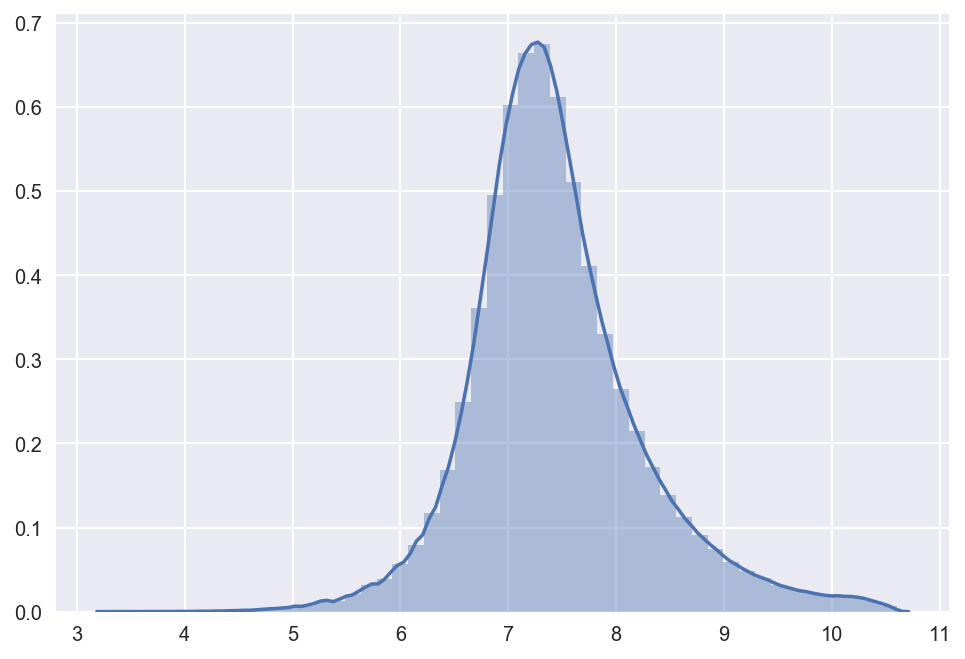

In [12]:
sns.distplot(np.log10(mhi))